In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data as web

In [13]:
import warnings
warnings.simplefilter('ignore',UserWarning)

In [14]:
df = web.get_data_yahoo('BTC-USD', start = '2014-09-25', end = '2021-08-25')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-24,436.112000,421.131989,435.751007,423.204987,3.062770e+07,423.204987
2014-09-25,423.519989,409.467987,423.156006,411.574005,2.681440e+07,411.574005
2014-09-26,414.937988,400.009003,411.428986,404.424988,2.146080e+07,404.424988
2014-09-27,406.622986,397.372009,403.556000,399.519989,1.502930e+07,399.519989
2014-09-28,401.016998,374.332001,399.471008,377.181000,2.361330e+07,377.181000
...,...,...,...,...,...,...
2021-08-21,49717.019531,48312.199219,49327.074219,48905.492188,4.058521e+10,48905.492188
2021-08-22,49471.609375,48199.941406,48869.105469,49321.652344,2.537098e+10,49321.652344
2021-08-23,50482.078125,49074.605469,49291.675781,49546.148438,3.430505e+10,49546.148438


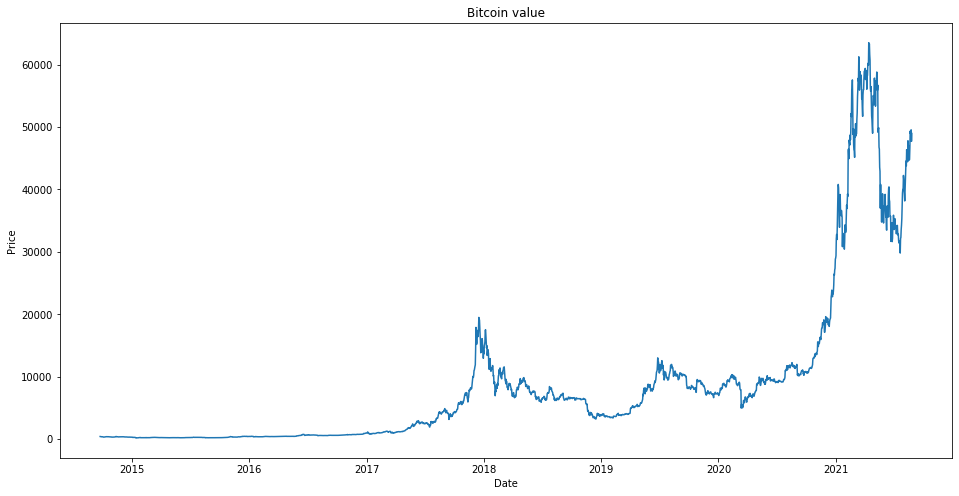

In [16]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.title('Bitcoin value')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [18]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [19]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-24,436.112000,421.131989,435.751007,423.204987,30627700.0,423.204987
2014-09-25,423.519989,409.467987,423.156006,411.574005,26814400.0,411.574005
2014-09-26,414.937988,400.009003,411.428986,404.424988,21460800.0,404.424988
2014-09-27,406.622986,397.372009,403.556000,399.519989,15029300.0,399.519989
2014-09-28,401.016998,374.332001,399.471008,377.181000,23613300.0,377.181000


In [20]:
len(df)

2524

In [21]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [22]:
df['Open'].fillna(value=df['Open'].mean(),inplace=True)

In [23]:
df.reset_index(drop=True,inplace=True)

In [55]:
#model=ARIMA(df['Open'].fillna(value=df['Open'].mean()),order=(2,1,2))
model=ARIMA(df['Open'],order=(2,1,2))
model_fit=model.fit()
model_fit.params

const           18.801589
ar.L1.D.Open    -0.487153
ar.L2.D.Open    -0.954377
ma.L1.D.Open     0.437519
ma.L2.D.Open     0.980253
dtype: float64

In [56]:
x=model_fit.predict(typ='levels')
print(x)

2         443.806281
3         431.735983
4         421.944199
5         418.693134
6         398.593503
            ...     
2519    46700.115631
2520    49138.821200
2521    49110.036445
2522    49383.879767
2523    49329.237882
Length: 2522, dtype: float64


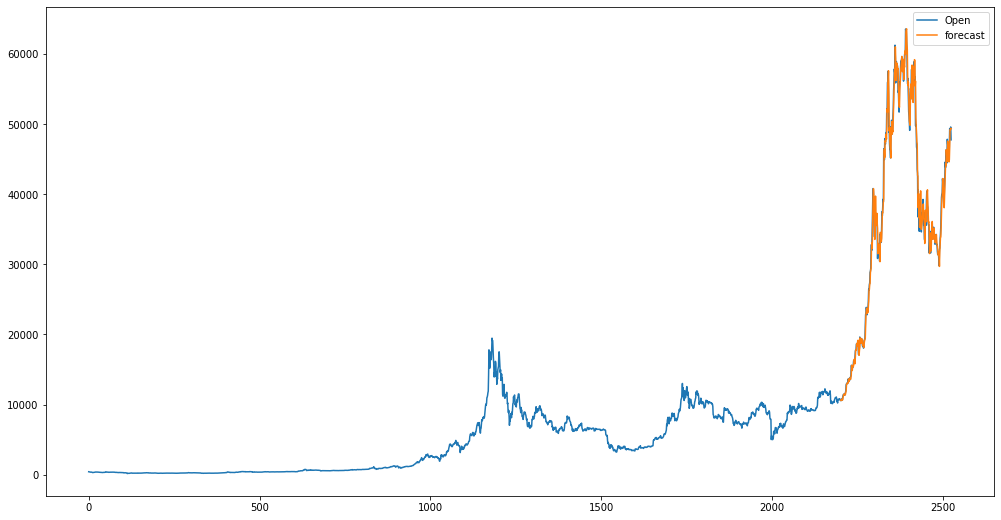

In [57]:
df['forecast']=model_fit.predict(start=2200,typ='levels')
df[['Open','forecast']].plot(figsize=(17,9))
plt.show()

In [58]:
mean_squared_error(df['Open'][2:len(df)],x)

423537.3748746528